1. dataset class
2. transform to tensor
3. DataLoader class

torch.Size([1, 1, 28, 28]) tensor([5]) (28, 28)


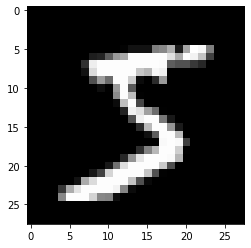

In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = MNIST('./mnist_data', train=True, download=True, transform = transform)

loader = DataLoader(
    dataset, # dataset class
    batch_size=1,  # number of training samples used in one iteration
    shuffle=False,
    num_workers=1,
#     collate_fn=None,  # if we want to merge datasets
#     pin_memory=False,  # Loading data on CUDA tensors
 )


loader_iter = iter(loader)
data = next(loader_iter)
image = data[0].cpu()  # transform tensor to np array, make sure its on the cpu
# image = image.reshape(1,0)
# imge = image.reshape([1,2,3])
print(data[0].shape, data[1], image.squeeze().numpy().shape)

plt.imshow( image.squeeze().numpy(), cmap='gray')
plt.show()

![Image](https://i.stack.imgur.com/zSZ3a.png)

# Custom DataLoader

In [8]:
from torch.utils.data import Dataset, DataLoader

class SquareDataset(Dataset):
     def __init__(self, a=0, b=1):
         super(Dataset, self).__init__()
         assert a <= b
         self.a = a
         self.b = b
        
     def __len__(self): # ovo se mora definirati
         return self.b - self.a + 1
        
     def __getitem__(self, index): # i ovo za uzeti  data, truth
        assert self.a <= index <= self.b
        return index, index**2

data_train = SquareDataset(a=0,b=64)
data_train_loader = DataLoader(data_train, batch_size=64, shuffle=True)

print(len(data_train))
print(len(data_train_loader))
print("len je 4 jer je batch size 32 a Dataset size 128")


65
2
len je 4 jer je batch size 32 a Dataset size 128


# Iteracija

In [10]:
data_train = SquareDataset(a=0,b=64)
data_train_loader = DataLoader(data_train, batch_size=16, shuffle=True)

for idx,(x, y) in enumerate(data_train_loader):
    print(x,y)

tensor([ 2, 54, 28, 19, 13, 53, 57,  4,  1,  3, 26, 46,  9, 30, 42, 37]) tensor([   4, 2916,  784,  361,  169, 2809, 3249,   16,    1,    9,  676, 2116,
          81,  900, 1764, 1369])
tensor([48, 60, 16,  7, 14, 24, 51, 15, 10, 45, 56, 32, 39, 29, 17,  5]) tensor([2304, 3600,  256,   49,  196,  576, 2601,  225,  100, 2025, 3136, 1024,
        1521,  841,  289,   25])
tensor([22, 27, 64, 12, 20, 62, 34, 49, 33, 63, 58, 38, 21, 50, 31, 36]) tensor([ 484,  729, 4096,  144,  400, 3844, 1156, 2401, 1089, 3969, 3364, 1444,
         441, 2500,  961, 1296])
tensor([44,  0, 47, 11, 52, 41,  6, 35, 40, 55, 25,  8, 61, 59, 43, 23]) tensor([1936,    0, 2209,  121, 2704, 1681,   36, 1225, 1600, 3025,  625,   64,
        3721, 3481, 1849,  529])
tensor([18]) tensor([324])
